# Práctica 2: Difracción por aberturas sencillas

## 1. Objetivos de la práctica

   - Observación del diagrama de difracción por una abertura rectangular y por otra circular
   - Obtención del tamaño de la rendija y de la abertura circular
   - Visualizacion del patron de difraccion de una doble rendija

    
## 2. Fundamento teórico

**Difracción de Fraunhofer**

La difracción es la tendencia de toda onda a apartarse de la propagación rectilínea mientras se propaga o pasa a través de una apertura u obstáculo.
Este efecto es básicamente resultado de procesos interferenciales y por lo tanto está íntimamente relacionado con la naturaleza ondulatoria de la luz.
Para su estudio vamos a basarnos en el Principio de Huygens-Fresnel, el cual es necesario destacar que se trata de una aproximación.
Para un tratamiento completo de la difracción debemos acudir a las ecuaciones de Maxwell. Sin embargo, el uso del principo de Huygens-Fresnel nos dará
resultados más que suficientes. Dicho principio dice lo siguiente:
    
Cada punto del frente de onda se puede suponer como centro secundario emisor de ondas esféricas. La perturbación total que llega a otro punto
posterior es el resultado de la interferencia de todas esas ondas secundarias.





### 2.1 Difracción por una rendija

Debido al efecto de la difracción la irradiancia en un punto sobre un plano de observación en la región de Fraunhofer está dada por:
    
  $$I(\beta) = I_0 \frac{\sin^2(\beta)}{\beta^2}$$ (1)

donde beta está definida como:
    
  $$\beta =  \frac{\pi  b \sin(\theta)}{\lambda}$$ (2)

siendo b la anchura de la abertura y theta el ángulo subtendido por el punto de observación respecto del eje normal al plano de la rendija. En estas
condiciones se tiene que D >> x por lo que $\sin (\theta) ≈ tan (\theta) ≈ x / D$ . Por lo tanto la expresión de $\beta$ dado por la ecuación (2) puede
aproximarse a:
           
  $$\beta = \frac{\pi  b x}{\lambda D}$$ (3)
    
siendo x la distancia del punto considerado al eje Y.
De esta manera se obtendrán mínimos de difracción cuando $I(\beta) = 0$. Esto ocurre en aquellas posiciones en las que $\beta$ sea un múltiplo entero
de $\pi: \beta = m\pi$, con m = ±1, ±2, ... ya que en el caso de m = 0 se tiene un máximo denominado máximo central de difracción.
Teniendo en cuenta la condición de mínimo y la ecuación de beta, la posición del mínimo de orden m esta dada por:
        
  $$x_m = \frac{\lambda  D}{b}m$$ (4)

(A) Diagrama esquemático del montaje experimental para la rendija sencilla

(B) Perfil de irradiacia en la pantalla

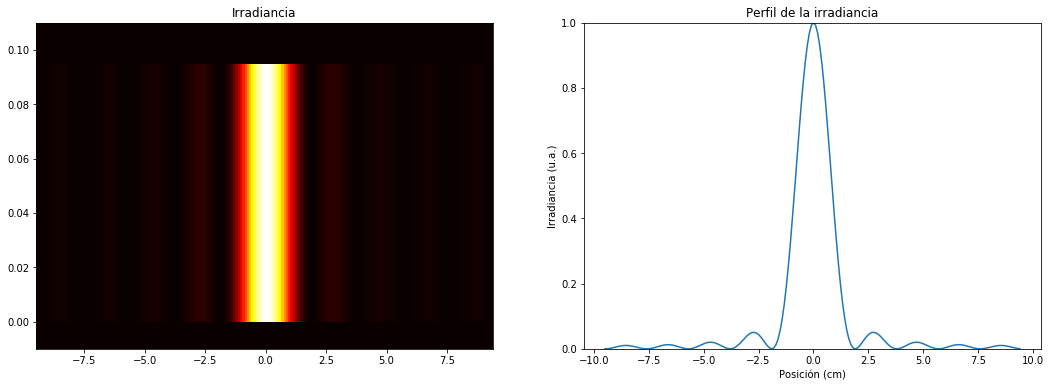

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fft2,ifft,ifft2,fftshift,fftfreq
from scipy.signal import square
#%matplotlib inline
%matplotlib notebook

## Parametros

a = 1e-4 # Tamaño de la rendija 
Lambda = 632.8e-9 # Longitud de onda del láser de He-Ne
z = 3 #Distancia a la pared en metros
x,y = np.mgrid[-1e-3:1e-3:1e-5,-1e-3:1e-3:1e-5]
rendija = np.abs(x)<a/2 # Definición de la función rendija

#Transformada de fourier
tfrendija = fftshift(fft2(rendija))
hx = 1e-5
hy = 1e-5

frecx = np.arange(-0.5,0.5,1/rendija.shape[0])*(1/hx)
frecy = np.arange(-0.5,0.5,1./rendija.shape[1])*(1/hy)

xnew = (Lambda*z*frecx) # Nuevas variables en el plano donde se observa la difracción
ynew = (Lambda*z*frecy)
irradiancia = np.abs(tfrendija).T**2 # Irradiancia observada

fig1,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].pcolormesh(xnew*100,ynew*100,irradiancia,cmap='hot') # para que salga en cm
ax[0].set_ylim(-0.01,0.11)
ax[0].set_title("Irradiancia")

#Representación de un corte a lo largo del eje X
corte = irradiancia[100,:]
ax[1].plot(xnew*1e2,corte/corte.max())
ax[1].set_xlabel('Posición (cm)')
ax[1].set_ylim(0,1)
ax[1].set_ylabel('Irradiancia (u.a.)')
ax[1].set_title("Perfil de la irradiancia")


Como vemos en la  ecuación (4) hay una relación lineal entre la posición $x_m$ en la que se localiza el mínimo de difracción de orden m y el orden 
de difracción m. Por ejemplo la distancia entre el mínimo de orden -2 y el de orden 3 está dada por:
    
  $$x_3 - x_2 = \frac{\lambda D}{b}(3-(-2)) = \frac{5\lambda D}{b}$$ (5)

Esta relación la aprovecharemos para estimar el valor de la anchura de la rendija problema si todos los demás parámetros son conocidos.

### Ejercicio 1

* Obtener la dimension de la rendija $b$ a partir de la diferencia en las posiciones de dos minimos, las cuales pueden medirse en el perfil de la irradiancia mostrado en la figura de la derecha. Para ello utilizar los parametros de longitud de onda y distancia de trabajo del codigo mostrado anteriormente.

### 2.2 Difracción por una abertura circular

Al incidir un haz de luz sobre una abertura circular, el diagrama de difracción que se observa consiste en una serie de franjas circulares
concéntricas. El fenómeno es similar al de una rendija, de hecho podríamos considerar la abertura circular como una colecci´on de rendijas de 
longitud variable que rellenan toda la abertura. En un punto dado de la pantalla la irradiancia resultante se obtiene mediante la suma coherente de
las contribuciones de cada una de las rendijas elementales. Esto da lugar a que la expresi´on de la irradiancia sea ligeramente distinta de la
expresión (1) y viene dada por:

   $$I(\theta) = I(0) \left(\frac{2 J_1\left(k a \sin\left(\theta\right)\right)}{k a \sin(\theta)}\right)^2$$ (6)

donde a es el radio de la abertura circular, $\theta$ la posición angular del punto de observación en la pantalla respecto al centro de la abertura y 
$k = 2\pi/\lambda$ es el número de ondas. En la expresión (6) $J_1$ representa la función de Bessel de primera clase de orden 1. La expresión (6) recibe el nombre de figura de Airy.

(A) Diagrama de difracción de una abertura circular

(B) Representación de la intensidad a lo largo la línea AB de la figura de Airy, normalizada a su valor máximo

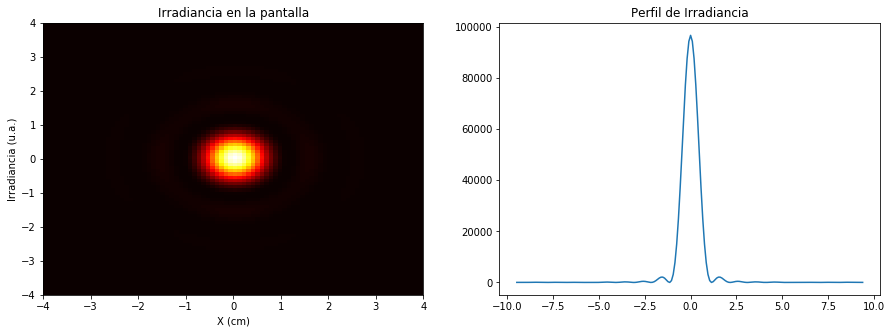

In [3]:
R0 = 1e-4 #Radio de la abertura
r = np.sqrt(x**2 + y**2)
circular = r<R0

#Transformada de fourier
tfcirc = fftshift(fft2(circular))
irradiancia = np.abs(tfcirc).T**2

fig2,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].pcolormesh(xnew*100,ynew*100,irradiancia,cmap='hot') # para que salga en cm
ax[0].set_xlim(-4,4)
ax[0].set_ylim(-4,4)
ax[0].set_title("Irradiancia en la pantalla")
ax[0].set_xlabel('X (cm)')
ax[0].set_ylabel('Y (cm)')

# Perfil de irradiancia a lo largo del eje X
corte = irradiancia[100,:]
ax[1].plot(xnew*100,corte)
ax[1].set_title("Perfil de Irradiancia")
ax[0].set_xlabel('X (cm)')
ax[0].set_ylabel('Irradiancia (u.a.)')

En la figura 2 se muestra la distribución de irradiancia producida por una abertura circular junto con la gráfica de la ecuación (6). El primer mínimo
de irradiancia (primer anillo oscuro) se obtiene cuando:
    
$$k a \sin(\theta) = 3.83$$ (7)    
    
Si la distancia desde la abertura a la pantalla de observación es considerablemente mayor que el radio del primer anillo oscuro, podemos aproximar en
la ecuación (7) el seno por el ángulo. De esta manera el ángulo subtendido por el primer anillo oscuro está dado por:
    
$$\theta ≈ \frac{3.83}{\pi}\frac{\lambda}{2a} = 1.22\frac{\lambda}{D_a}$$ (8)

donde $D_a$ = 2a es el diámetro de la abertura circular. El radio del primer anillo oscuro será:
    
$$r_1 = 1.22\frac{\lambda D}{D_a}$$ (9)    
 

### Ejercicio 2

* Obtener el diametro de la abertura circular $D_a$ utilizando las figuras anteriores y la ecuacion deducida para determinar la posicion del primer minimo del patron de difraccion

### 2.3 Doble Rendija

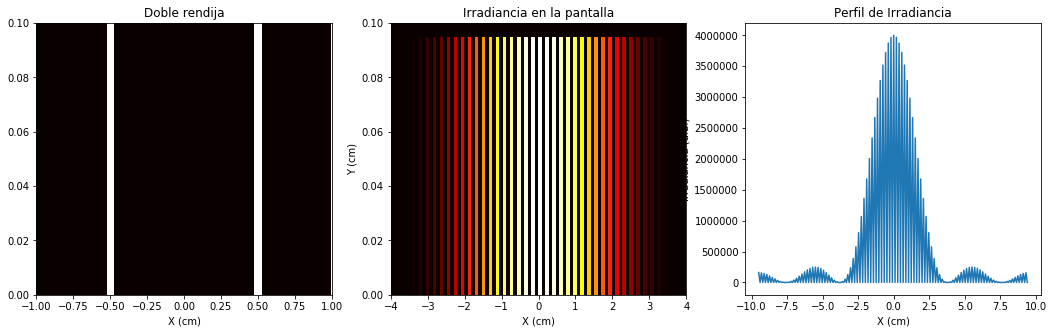

In [4]:
width_rendija = 0.5e-4
distance_rendijas = 5e-4
doblerendija = np.abs(x-distance_rendijas)<width_rendija/2   # Definición de la función rendija
doblerendija += np.abs(x+distance_rendijas)<width_rendija/2

#Transformada de fourier
tfdoble = fftshift(fft2(doblerendija))
irradiancia = np.abs(tfdoble).T**2

fig3,ax = plt.subplots(1,3,figsize=(18,5))

ax[0].pcolormesh(x*1000,y*1000,doblerendija,cmap='hot') # para que salga en cm
ax[0].set_xlim(-1,1)
ax[0].set_ylim(-0,0.1)
ax[0].set_title("Doble rendija")
ax[0].set_xlabel('X (cm)')


ax[1].pcolormesh(xnew*100,ynew*100,irradiancia,cmap='hot') # para que salga en cm
ax[1].set_xlim(-4,4)
ax[1].set_ylim(-0,0.1)
ax[1].set_title("Irradiancia en la pantalla")
ax[1].set_xlabel('X (cm)')
ax[1].set_ylabel('Y (cm)')

# Perfil de irradiancia a lo largo del eje X
corte = irradiancia[100,:]
ax[2].plot(xnew*100,corte)
ax[2].set_title("Perfil de Irradiancia")
ax[2].set_xlabel('X (cm)')
ax[2].set_ylabel('Irradiancia (u.a.)')

### Ejercicio 3

* Variar en el codigo anterior los parametros $width_rendija$ y $distance_rendijas$ y explicar los cambios observados en la irradiancia en la pantalla.